## Exercise 1

In this exercise, you will use PCA to reduce the MINST data set and visualize the approximation.

### Step 1: Load the data

You don't actually have to do anything here!  Just run the code...

In [1]:
# @SHOW
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load MNIST data
mnist = fetch_openml("mnist_784", version=1)
X, y = mnist["data"].values, mnist["target"].astype(int).values

# Sample the dataset to speed up computation (Optional)
X, y = X[:7000], y[:7000]

# Split the dataset
X_mnist_train, X_mnist_test, y_mnist_train, y_mnist_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Step 2: Use PCA to reduce the data set


Visualize your result with a 2d scatter plot, colored by class (the digit identitiy)

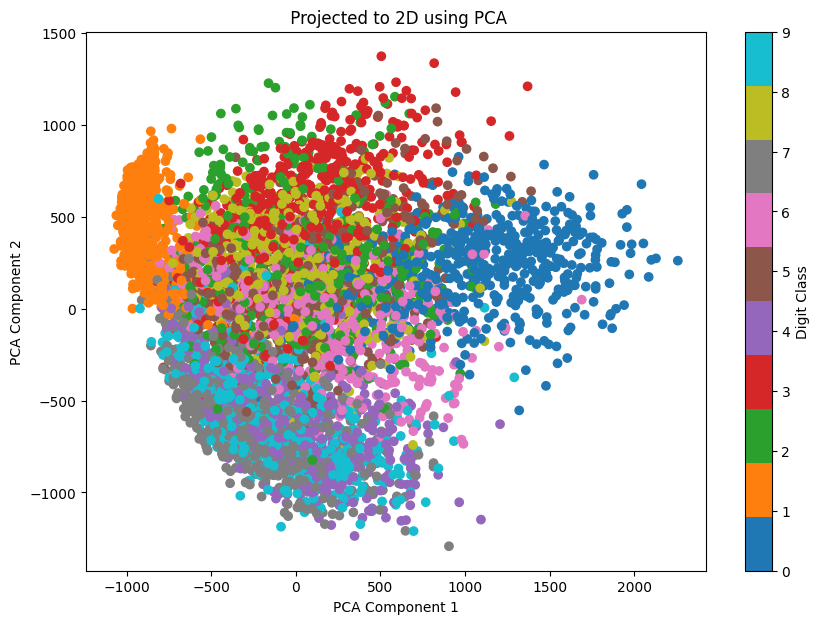

In [2]:
# Your code here
# Step 2: Apply PCA to reduce to 2D
pca = PCA(n_components=2)
X_mnist_pca = pca.fit_transform(X_mnist_train)

# Step 3: Plot PCA results
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_mnist_pca[:, 0], X_mnist_pca[:, 1], 
                      c=y_mnist_train, cmap='tab10')

plt.colorbar(scatter, label="Digit Class")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title(" Projected to 2D using PCA")
plt.show()

#### Step 3: Scree plot

Calculate and visualize a scree plot for the first 40 component.  The y-axis should be 'percent of variance explained'.

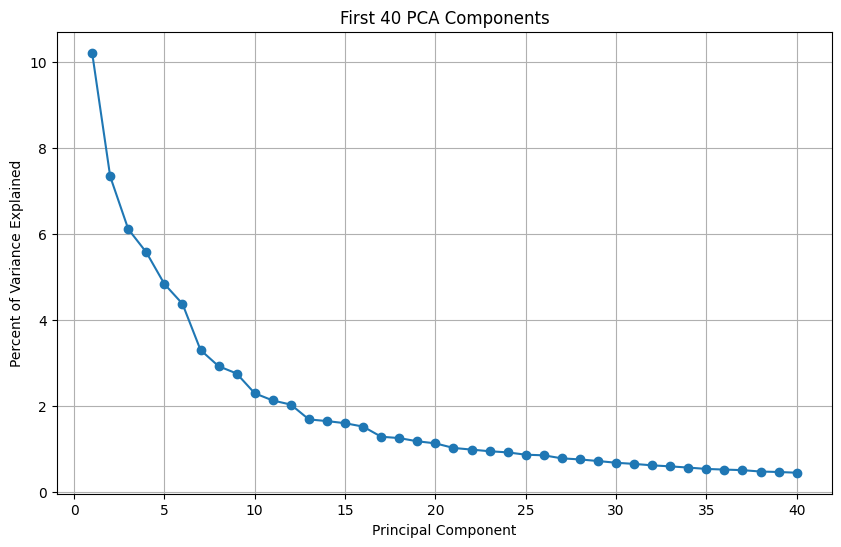

In [3]:

first_40 = PCA(n_components=40)
first_40.fit(X_mnist_train)

explained_variance_ratio = first_40.explained_variance_ratio_ * 100

# Plot Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 41), explained_variance_ratio, marker='o')
plt.xlabel("Principal Component")
plt.ylabel("Percent of Variance Explained")
plt.title("First 40 PCA Components")
plt.grid(True)
plt.show()



#### Step 4: Select the number of components


Calculate the number of components required to explain 95% of the variance

In [4]:
# Your code here
# Fit PCA on all components (or enough to capture 95%)
pca_full = PCA().fit(X_mnist_train)

# Cumulative explained variance
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Find number of components for 95% variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components required to explain 95% variance: {n_components_95}")

Number of components required to explain 95% variance: 148


### Step 5: Visualize a digit in the reduced dimensionality space


I've provided a function for visualizing a digit. Figure out how to visualize the same digit using the number of dimensions identified in Step 4.

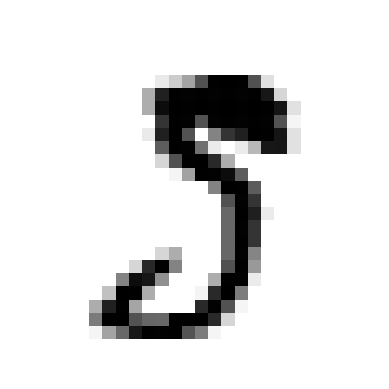

In [5]:
# @SHOW
def plot_mnist_digit(digit):
    """Plot a single MNIST digit.

    Parameters:
    digit (numpy array): A flattened 1D numpy array of length 784.

    """
    # Reshape the flattened digit to 28x28 image
    digit_image = digit.reshape(28, 28)
    
    plt.imshow(digit_image, cmap='binary')
    plt.axis("off")
    plt.show()

plot_mnist_digit(X_mnist_train[0])

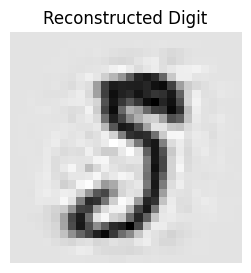

In [8]:
# Your code here
pca_95 = PCA(n_components=n_components_95)
X_mnist_pca_95 = pca_95.fit_transform(X_mnist_train)

# Take the first digit, reduce & reconstruct
digit_reduced = X_mnist_pca_95[0]
digit_reconstructed = pca_95.inverse_transform(digit_reduced)

plt.figure(figsize=(6,3))
plt.title("Reconstructed Digit")
plot_mnist_digit(digit_reconstructed)


plt.show()

### Step 6: Use dimensionality reduction to preprocess data


See how a KNN Classifier works with and without dimensionality reduction. Preserve 80% of the variance.

In [9]:
# Your code here
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# --- KNN without dimensionality reduction ---
knn_raw = KNeighborsClassifier(n_neighbors=3)
knn_raw.fit(X_mnist_train, y_mnist_train)
y_pred_raw = knn_raw.predict(X_mnist_test)
acc_raw = accuracy_score(y_mnist_test, y_pred_raw)
print(f"KNN without PCA - Accuracy: {acc_raw:.4f}")

# --- PCA to preserve 80% variance ---
pca_80 = PCA(0.80)   # keep 80% variance
X_train_pca80 = pca_80.fit_transform(X_mnist_train)
X_test_pca80 = pca_80.transform(X_mnist_test)
n_components_80 = np.argmax(cumulative_variance >= 0.80) + 1
print(f"Number of components to preserve 80% variance: {n_components_80}")

# --- KNN with dimensionality reduction ---
knn_pca = KNeighborsClassifier(n_neighbors=3)
knn_pca.fit(X_train_pca80, y_mnist_train)
y_pred_pca = knn_pca.predict(X_test_pca80)
acc_pca = accuracy_score(y_mnist_test, y_pred_pca)
print(f"KNN with PCA (80% variance) - Accuracy: {acc_pca:.4f}")

KNN without PCA - Accuracy: 0.9429
Number of components to preserve 80% variance: 42
KNN with PCA (80% variance) - Accuracy: 0.9457


## Exercise 2
<!-- @q -->
1. Try using t-SNE to visualize the MNIST data above.

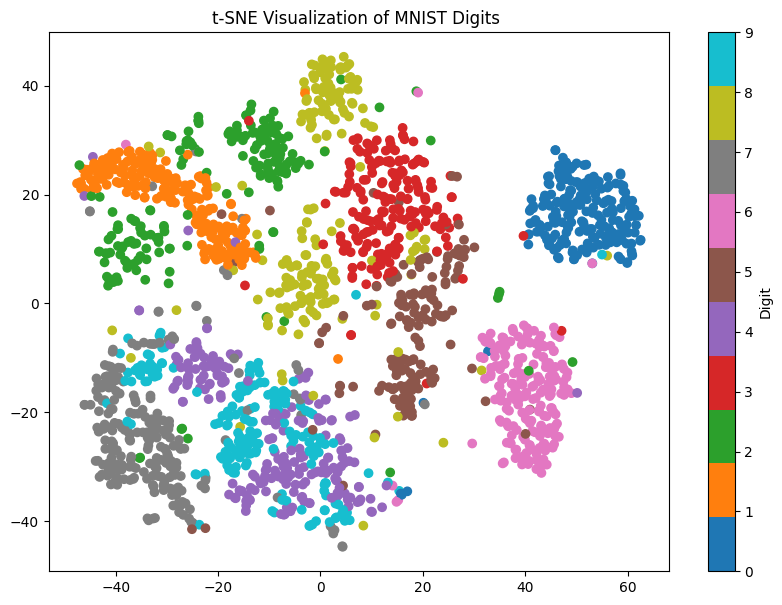

In [10]:
# Your code here
from sklearn.manifold import TSNE


n_samples = 2000
X_subset = X_mnist_train[:n_samples]
y_subset = y_mnist_train[:n_samples]


tsne = TSNE(n_components=2, perplexity=30,random_state=42)
X_tsne = tsne.fit_transform(X_subset)

# Plot t-SNE visualization
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], 
                      c=y_subset, cmap="tab10")
plt.colorbar(scatter, ticks=range(10), label="Digit")
plt.title("t-SNE Visualization of MNIST Digits ")
plt.show()

2. Try using a KNN classifier to predict the data with TSNE.  How does it perform?

In [12]:
# Your code here
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE

# Use same subset (for speed)
n_samples = 2000
X_subset = X_mnist_train[:n_samples]
y_subset = y_mnist_train[:n_samples]
X_test_subset = X_mnist_test[:500]
y_test_subset = y_mnist_test[:500]

# PCA before t-SNE (recommended)
X_pca50 = PCA(n_components=50, random_state=42).fit_transform(X_subset)
X_test_pca50 = PCA(n_components=50, random_state=42).fit(X_mnist_train).transform(X_test_subset)

# Fit t-SNE on train set
tsne = TSNE(n_components=2, perplexity=30,  random_state=42)
X_tsne_train = tsne.fit_transform(X_pca50)


X_train_small, X_val_small, y_train_small, y_val_small = train_test_split(
    X_tsne_train, y_subset, test_size=0.3, random_state=42
)

# Train KNN on t-SNE data
knn_tsne = KNeighborsClassifier(n_neighbors=3)
knn_tsne.fit(X_train_small, y_train_small)

# Predict on validation
y_pred_tsne = knn_tsne.predict(X_val_small)
acc_tsne = accuracy_score(y_val_small, y_pred_tsne)

print(f"KNN on t-SNE (2D) - Accuracy: {acc_tsne:.4f}")

KNN on t-SNE (2D) - Accuracy: 0.9183


## Exercise 3

Try using UMAP to process the MNIST data.  Visualize the data first.

In [13]:
# @SHOW
# You might need to install UMAP.  If so, uncomment the following lines and run them

#%pip install numpy==2.0
%pip install umap-learn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


/usr/local/python/3.12.1/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/usr/local/python/3.12.1/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


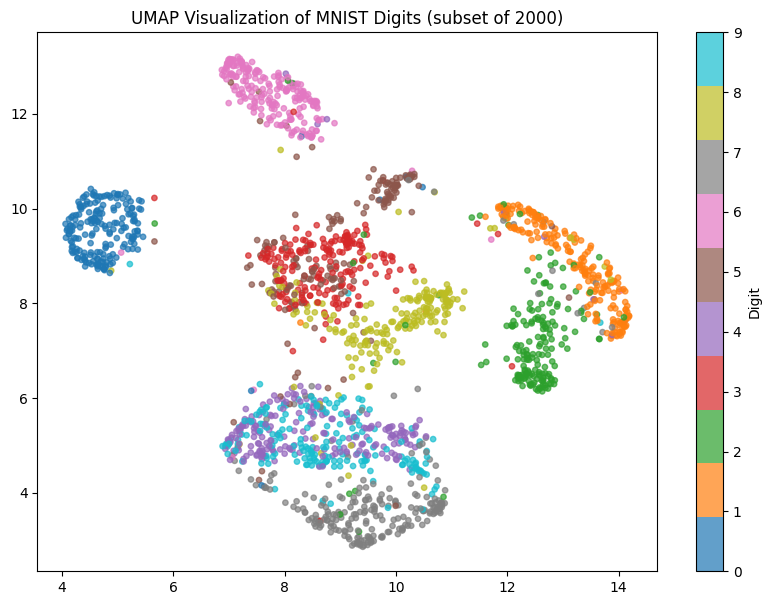

In [ ]:
# Your code here
import umap.umap_ as umap

# Subset for speed
n_samples = 2000
X_subset = X_mnist_train[:n_samples]
y_subset = y_mnist_train[:n_samples]

# Run UMAP to reduce to 2D
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_subset)

# Plot UMAP visualization
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], 
                      c=y_subset, cmap="tab10", alpha=0.7, s=15)
plt.colorbar(scatter, ticks=range(10), label="Digit")
plt.title("UMAP Visualization of MNIST Digits ")
plt.show()

Now, calculate accuracy with KNN.

In [15]:
# Your code here
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import umap.umap_ as umap

# Subset for speed
n_samples = 2000
X_subset = X_mnist_train[:n_samples]
y_subset = y_mnist_train[:n_samples]

# Split into train/validation for testing
X_train_small, X_val_small, y_train_small, y_val_small = train_test_split(
    X_subset, y_subset, test_size=0.3, random_state=42
)

# Fit UMAP on training subset
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
X_train_umap = umap_model.fit_transform(X_train_small)

# Transform validation set
X_val_umap = umap_model.transform(X_val_small)

# Train KNN on UMAP embedding
knn_umap = KNeighborsClassifier(n_neighbors=3)
knn_umap.fit(X_train_umap, y_train_small)

# Predict on validation set
y_pred_umap = knn_umap.predict(X_val_umap)
acc_umap = accuracy_score(y_val_small, y_pred_umap)
print(f"KNN on UMAP (2D) - Accuracy: {acc_umap:.4f}")

/usr/local/python/3.12.1/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


KNN on UMAP (2D) - Accuracy: 0.7533


## Exercise 4

In the following, I've set up some sample data. Examine the relative performance of PCA and UMAP; for each, try gradually increasing the number of dimensions and examine the impact on KNN. You should also try different parameter settings for UMAP. Make sure to visualize your data after dimensionality reduction to understand what's going on!

Original Data Accuracy: 0.844


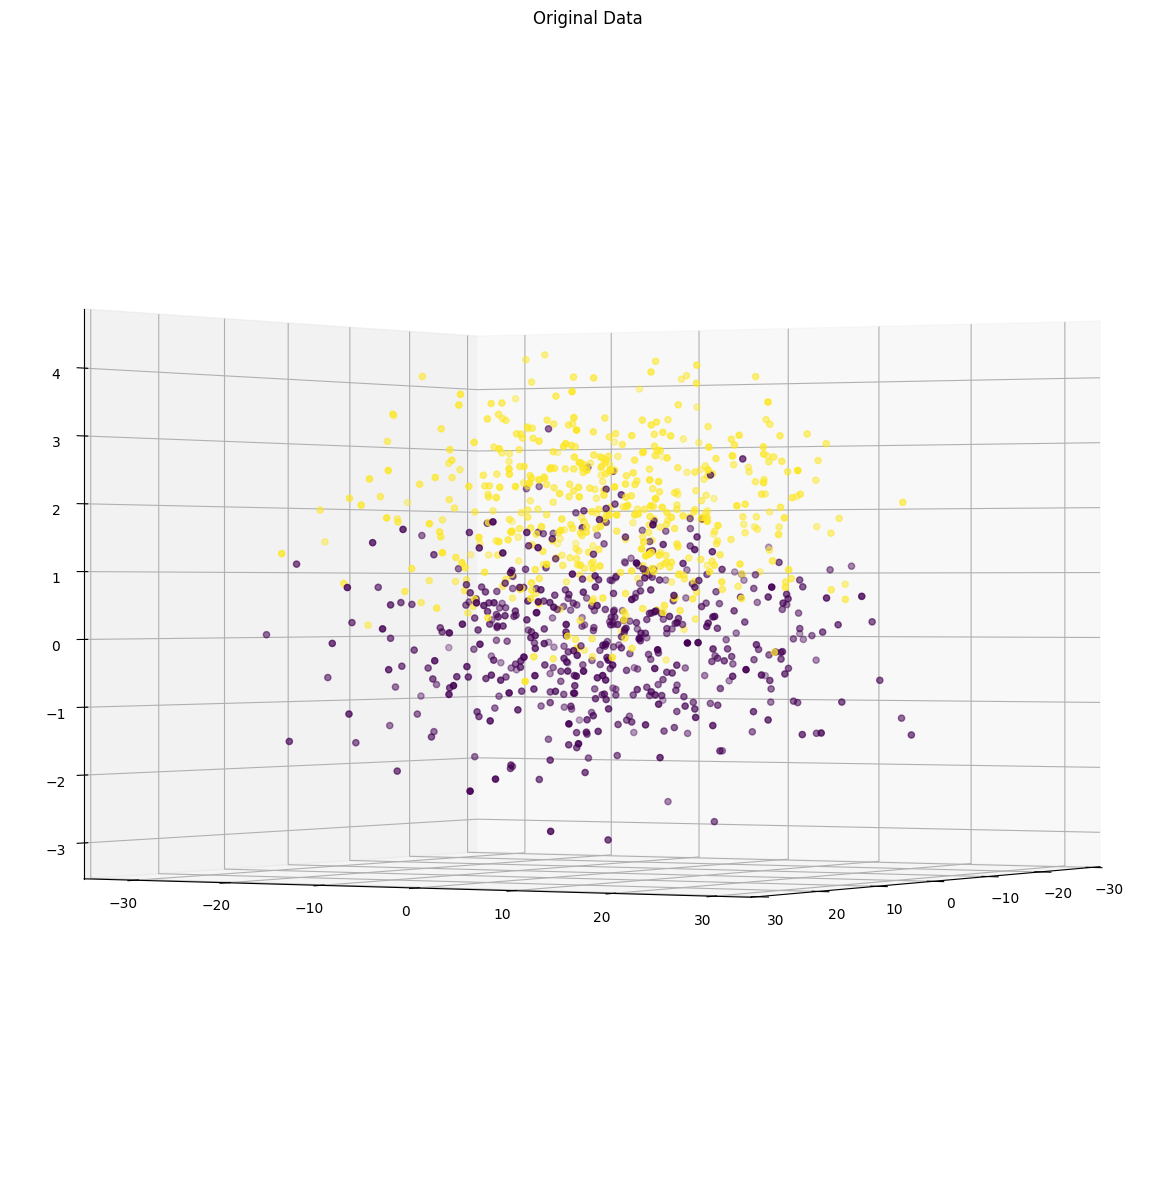

In [16]:
# @SHOW
# Generate synthetic data
np.random.seed(0)
n_points = 500

# Class 0
x0 = np.random.normal(loc=0, scale=10, size=n_points)
y0 = np.random.normal(loc=0, scale=10, size=n_points)
z0 = np.random.normal(loc=0, scale=1, size=n_points)

# Class 1
x1 = np.random.normal(loc=0, scale=10, size=n_points)
y1 = np.random.normal(loc=0, scale=10, size=n_points)
z1 = np.random.normal(loc=2, scale=1, size=n_points)

X = np.vstack((np.hstack((x0, x1)), np.hstack((y0, y1)), np.hstack((z0, z1)))).T
y = np.hstack((np.zeros(n_points), np.ones(n_points)))



# Train KNN on original data
knn = KNeighborsClassifier()
knn.fit(X, y)
y_pred = knn.predict(X)
print(f"Original Data Accuracy: {accuracy_score(y, y_pred)}")

# Create a new figure
fig = plt.figure(figsize=(15,15))

# Add 3D subplot
# The format is (rows, columns, plot_number)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=0, azim=30)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis')
ax.set_title('Original Data')

plt.show()


In [17]:
# @SHOW
# Set up train and test, and examine predictions without dimensionality reduction

X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f"Original Data Accuracy: {accuracy_score(y_test, y_pred)}")

Original Data Accuracy: 0.725


1. Try with PCA

In [18]:
# Your code here
# Apply PCA to preserve 80% variance
pca = PCA(0.80)  # automatically selects n_components to preserve 80% variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(f"Number of components to preserve 80% variance: {pca.n_components_}")

# Train KNN on PCA-reduced data
knn_pca = KNeighborsClassifier()
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
print(f"KNN Accuracy after PCA (80% variance): {accuracy_score(y_test, y_pred_pca)}")

Number of components to preserve 80% variance: 2
KNN Accuracy after PCA (80% variance): 0.505


In [ ]:
# Your code here


2. Try with UMAP.

In [19]:
# Your code here
import umap.umap_ as umap

# Fit UMAP on training data
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
X_train_umap = umap_model.fit_transform(X_train)
X_test_umap = umap_model.transform(X_test)

# Train KNN on UMAP-reduced data
knn_umap = KNeighborsClassifier()
knn_umap.fit(X_train_umap, y_train)
y_pred_umap = knn_umap.predict(X_test_umap)

print(f"KNN Accuracy after UMAP (2D): {accuracy_score(y_test, y_pred_umap)}")

/usr/local/python/3.12.1/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


KNN Accuracy after UMAP (2D): 0.545


In [ ]:
# Your code here


Explain your results in the cell below.  Which works better?  Why?

After applying PCA to preserve 80% of the variance, KNN achieved an accuracy of 0.505, while with UMAP the accuracy improved to 0.545. This suggests that UMAP worked better than PCA in this case. The main reason is that PCA is a linear method it only captures directions of maximum variance, which may not align with the features most relevant for classification. In contrast, UMAP is a nonlinear manifold learning method that preserves both local and some global structure, making it more effective for capturing complex class boundaries in the data. 
